In [1]:
#https://gisdata.fultoncountyga.gov/datasets/JohnsCreekGA::financial-expenditures/data

#from arcgis.gis import GIS
#gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

import json
import urllib.request
from urllib.parse import urlparse


jc_data = "https://opendata.arcgis.com/datasets/805dee052b8e403ab1e8b426a4fd75cf_0.geojson"
outfile = "jc_data.json"
    
urllib.request.urlretrieve(jc_data, outfile)

print ("Downloaded")

Downloaded


In [2]:
with open(outfile, "r") as read_file:
    data = json.load(read_file)

In [3]:
import pandas as pd

current_data = "[" #an array of {},

index = 0

for f in data['features']:
    
    if (f['properties']['FiscalYear'] == 2019):
        temp = f['properties']
        
        current_data += json.dumps(temp)
        current_data += ","
        index +=1

current_data = current_data[:-1] #less ","
current_data += "]"
  
df = pd.read_json (current_data)

In [4]:
dd = df.groupby(['Department'])
gd = dd.sum()
dpt_spend = gd['Amount']

frame = { 'City Department Spending': dpt_spend}
result = pd.DataFrame(frame)
total = result['City Department Spending'].sum()

result['Percentage'] = (result['City Department Spending']/total)*100

result = result.sort_values(by=['Percentage'],ascending=False)
result.head(80)

,City Department Spending,Percentage
Department,,
Capital Projects - City Hall,8746510.42,17.847119
Capital Projects Fund (New),8336807.29,17.011126
Fire,6498941.66,13.260990
Police Administration,6261082.16,12.775641
Maintenance Accruals Fund,5460554.94,11.142178
Public Works Operations,4660441.21,9.509558
Recreation,1298495.94,2.649561
Data Processing/ MIS,1295891.18,2.644246
Planning & Zoning,1269411.61,2.590215


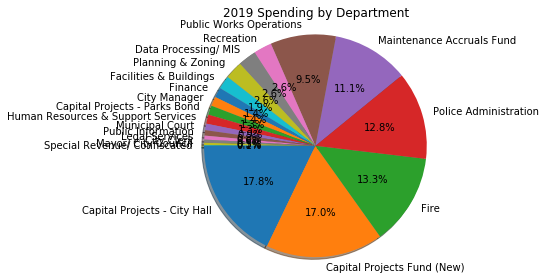

In [8]:
import matplotlib.pyplot as plt

departments = list(result.index)
percentage = result['Percentage']

#for i in range(0,len(percentage)):
#    if (percentage[i] < 3):
#        departments[i] = ""

plt.title("2019 Spending by Department")

plt.pie(percentage, labels=departments, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.tight_layout()

#plt.legend(loc="upper right")

plt.show()

In [12]:
de = df.groupby(['Vendor'])
ge = de.sum()
dptv_spend = ge['Amount']

frame = { 'Vendor Spending': dptv_spend}
resultv = pd.DataFrame(frame)
total = resultv['Vendor Spending'].sum()

resultv['Percentage'] = (resultv['Vendor Spending']/total)*100

resultv = resultv.sort_values(by=['Percentage'],ascending=False)
resultv.head(20)

,Vendor Spending,Percentage
Vendor,,
ACH,19657073.14,40.109954
VERTICAL EARTH INC,4278074.70,8.729345
BLUE CROSS & BLUE SHIELD OF GA INC,2435723.48,4.970056
CH2M HILL ENGINEERS INC.,2155199.30,4.397651
ALLIED PAVING CONTRACTORS INC,1982479.54,4.045219
PLM VENTURES LLC,1700675.71,3.470202
CAROTHERS & MITCHELL LLC,1449928.76,2.958557
APEX INSURANCE AGENCY INC,1111704.15,2.268415
OPTECH RWM LLC,812583.69,1.658064


In [15]:
print(resultv.loc['KIMBERLY SNOW SAUNDERS'])
print(resultv.loc['APPEN NEWSPAPERS INC'])

Vendor Spending    3638.740000
Percentage            0.007425
Name: KIMBERLY SNOW SAUNDERS, dtype: float64
Vendor Spending    7877.100000
Percentage            0.016073
Name: APPEN NEWSPAPERS INC, dtype: float64


In [10]:
dh = df.groupby(['ExpenseCategory'])
gh = dh.sum()
gh.head(200)

,Amount,CreditAmount,DepartmentCode,DraftAmount,FiscalYear,FiscalYearPeriod,FunctionDesc,OBJECTID,PaymentID,PaymentMonth,ProgramCode,SequenceCode,ServiceCode
ExpenseCategory,,,,,,,,,,,,,
Advertising,23666.61,187,254491,23854.11,183729,473,0.0,9659999,636076.0,500,476203000,3449,9100
Audit,23750.00,0,4533,23750.00,6057,18,0.0,318884,105330.0,9,15636003,153,300
Books & Periodicals,852.00,0,2650,852.00,2019,1,0.0,102278,34065.0,10,5314000,65,100
Building,3959.21,0,23475,3959.21,30285,128,0.0,1639911,36143.0,83,78330045,840,1500
Buildings,103633.15,80,0,103713.10,135273,376,0.0,7114945,1901070.0,415,362671000,0,20234
Buy Money,5105.00,0,12840,5105.00,8076,20,0.0,423276,71035.0,32,21244052,84,400
CH2M Hill,2146799.30,0,98640,2146799.30,70665,199,0.0,3721350,1230370.0,202,182420070,264,5810
Capital Lease Interest,13429.15,0,35100,13429.15,20190,56,0.0,1062540,351729.0,62,58220000,510,1000
Capital Lease Principal,205917.12,0,35100,205917.12,20190,56,0.0,1062511,351729.0,62,58120000,510,1000


In [9]:
print (gh.loc['Gym Membership']['Amount'])
print (gh.loc['Uniforms']['Amount'])
print (gh.loc['Hospitality']['Amount'])
print (gh.loc['Car Allowance']['Amount'])

12390.0
85091.87999999995
38155.38
30480.0
